In [3]:
import pandas as pd
data=pd.read_csv("Delivery_time.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


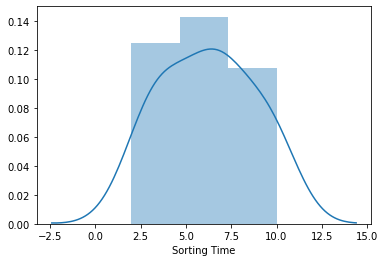

In [7]:
import seaborn as sns
sns.distplot(data['Sorting Time'])

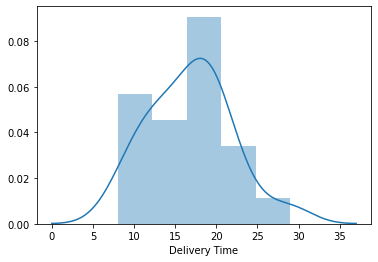

In [8]:
import seaborn as sns
sns.distplot(data['Delivery Time'])

In [20]:
delivery=pd.DataFrame(data['Delivery Time'])
sorting=pd.DataFrame(data['Sorting Time'])

In [21]:
import statsmodels.formula.api as smf
model = smf.ols("delivery~sorting",data = data).fit()

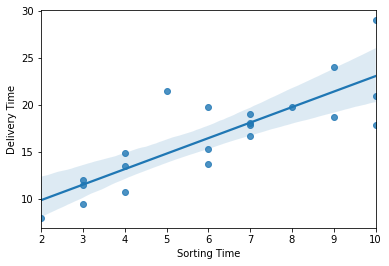

In [16]:
sns.regplot(x="Sorting Time", y="Delivery Time", data=data);

In [22]:
model.params

Intercept    6.582734
sorting      1.649020
dtype: float64

In [23]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)    

Intercept    3.823349
sorting      6.387447
dtype: float64 
 Intercept    0.001147
sorting      0.000004
dtype: float64


In [24]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [30]:
# Predict for new data point
new=pd.Series([5,10])

In [31]:
new

0     5
1    10
dtype: int64

In [40]:
dp=pd.DataFrame(new,columns=['sorting'])

In [41]:
dp

,sorting
0,5
1,10


In [42]:
model.predict(dp)

0    14.827833
1    23.072933
dtype: float64